# Generate Moon data:
In this assignment, we generate a synthetic dataset using Moon data and apply bagging to experience ensemble learning.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

# Lets generate 500 random instances
X, y = make_moons(n_samples=500, noise=0.6, random_state=42)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
#is it balanced?
np.bincount(y_test)

array([61, 64])

# Lets train a simple decision tree model

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Evaluate the decision tree model

In [13]:
from sklearn.metrics import accuracy_score
y_pred_tree = tree_clf.predict(X_test)
print("Accurcy of decision tree is: ", accuracy_score(y_test, y_pred_tree))

Accurcy of decision tree is:  0.688


# Bagging ensembles (Reduce Variance)
Now, lets use ensemble learning using Bagging to see if random sampling has any impact

In [14]:
from sklearn.ensemble import BaggingClassifier

# Create 500 decision tree each with 250 sample and aggregate the results.
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=0.5, bootstrap=True, n_jobs=-1, random_state=42)

# Train bag_clf
bag_clf.fit(X_train, y_train)

# predict the lables for the test data
y_pred = bag_clf.predict(X_test)


In [15]:
from sklearn.metrics import f1_score
print(f1_score(y_train, bag_clf.predict(X_train)))
print(f1_score(y_test, bag_clf.predict(X_test)))


0.9184782608695652
0.7368421052631579


# Evaluate model

In [16]:
print("Accurcy of ensemble algorithm of 500 trees is: ",accuracy_score(y_test, y_pred))

Accurcy of ensemble algorithm of 500 trees is:  0.76


# Can you assess if bag_clf you just made is over or underfitting?

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Lets define the function that plots the decision boundary
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

# Plot decision boundary for both models. Which one overfits?

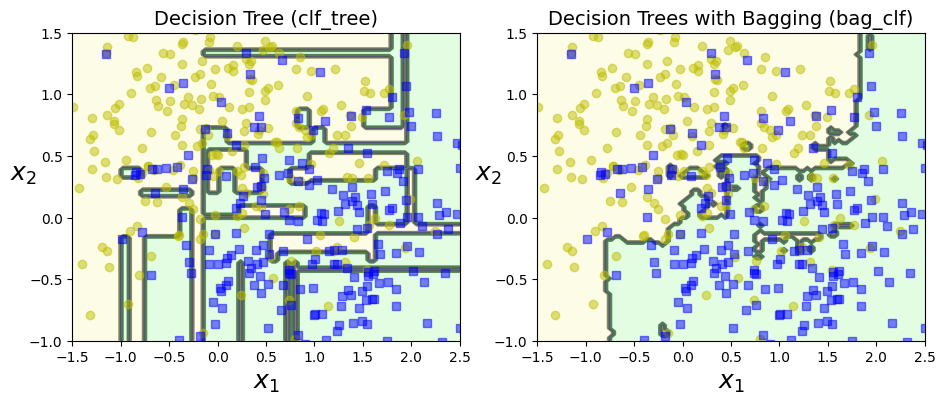

In [18]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree (clf_tree)", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging (bag_clf)", fontsize=14)

plt.show()